# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler

In [2]:
from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
countries.columns

Index(['Country', 'Region', 'Population', 'Area', 'Pop_density',
       'Coastline_ratio', 'Net_migration', 'Infant_mortality', 'GDP',
       'Literacy', 'Phones_per_1000', 'Arable', 'Crops', 'Other', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [6]:
columns_to_parse_to_float = ['Agriculture', 'Arable', 'Birthrate', 'Climate',
                             'Coastline_ratio', 'Crops', 'Deathrate', 'Industry',
                             'Infant_mortality', 'Literacy', 'Net_migration', 'Other',
                             'Phones_per_1000', 'Pop_density', 'Service']
for column in columns_to_parse_to_float:
    countries[column] = pd.to_numeric(countries[column].str.replace(',', '.'), errors='coerce')
countries['Region'] = countries['Region'].str.strip()
countries['Country'] = countries['Country'].str.strip()

In [7]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

In [8]:
countries.isnull().sum()

Country              0
Region               0
Population           0
Area                 0
Pop_density          0
Coastline_ratio      0
Net_migration        3
Infant_mortality     3
GDP                  1
Literacy            18
Phones_per_1000      4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64

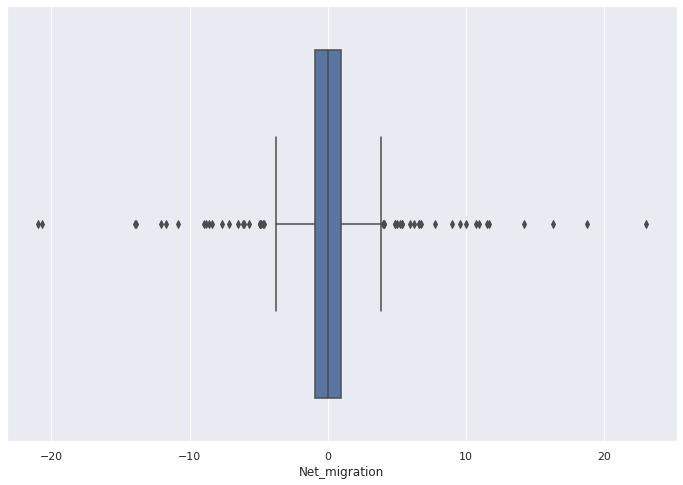

In [9]:
sns.boxplot(x=countries["Net_migration"])

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [10]:
def q1():
    return list(np.sort(countries['Region'].unique()))

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [11]:
def q2():
    X = np.array(countries['Pop_density']).reshape(-1,1)
    y = countries['Region']
    estimator = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    result = estimator.fit_transform(X, y) >= 9.
    return int(np.sum(result))

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [12]:
def q3():
    enc = OneHotEncoder(handle_unknown='ignore')
    new_dt = pd.DataFrame(countries[['Region', 'Climate']])
    new_dt.Climate.fillna(0, inplace=True)
    result = enc.fit_transform(new_dt)
    return int(result.shape[1])

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [13]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

columns = countries.select_dtypes(include=['int64', 'float64']).columns

pipeline = Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])
transformer = ColumnTransformer(transformers=[('number', pipeline, columns)], n_jobs=-1)

transformer.fit(countries)

ColumnTransformer(n_jobs=-1,
                  transformers=[('number',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Population', 'Area', 'Pop_density', 'Coastline_ratio', 'Net_migration',
       'Infant_mortality', 'GDP', 'Literacy', 'Phones_per_1000', 'Arable',
       'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object'))])

In [14]:
def q4():
    test_dt = pd.DataFrame([test_country], columns=countries.columns)
    result = transformer.transform(test_dt)[0][columns.get_loc('Arable')]
    return round(float(result),3)

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [15]:
def q5():
    q1, q3 = countries['Net_migration'].dropna().quantile([.25, .75])
    iqr = q3 - q1

    inferior_outlier = q1 - 1.5 * iqr
    upper_outlier = q3 + 1.5 * iqr

    outliers_below = int(countries[countries['Net_migration'] < inferior_outlier].shape[0])
    outliers_above = int(countries[countries['Net_migration'] > upper_outlier].shape[0])

    return outliers_below, outliers_above, False

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [16]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=12)

In [17]:
def q6():
    vectorizer = CountVectorizer()
    document_term_matrix = vectorizer.fit_transform(newsgroup.data)
    map_vocabulary = vectorizer.vocabulary_
    return int(document_term_matrix[:, map_vocabulary['phone']].sum())

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [18]:
def q7():
    tfidf_vectorizer = TfidfVectorizer().fit(newsgroup.data)
    tfidf_count = tfidf_vectorizer.transform(newsgroup.data)
    map_vocabulary = tfidf_vectorizer.vocabulary_
    return float(tfidf_count[:, map_vocabulary['phone']].sum().round(3))